# 对泰坦尼克号数据进行分析，哪些因素会影响乘客的生还率

影响乘客生还率的因素很多，这里只讨论乘客的性别、年龄、以及舱位是否对生还率产生影响。<p>
1.性别对生还率的影响<p>
2.年龄对生还率的影响<p>
3.舱位对生还率的影响<p>
4.年龄和性别共同对生还率的影响<p>
5.年龄和舱位共同对生还率的影响<p>
6.性别和舱位共同对生还率的影响<p>
7.年龄、性别、舱位共同对生还率的影响<p>

In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')#设置样式
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
import os
os.chdir('D:\\CDA\\File')

# 数据理解

In [115]:
titanic = pd.read_csv("titanic_train.csv")
print(titanic.shape)
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
titanic.info()#缺失值，数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 缺失值处理

In [117]:
titanic=titanic.drop("Cabin",axis=1)#删除cabin列
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [118]:
titanic["Age"].mean()

29.69911764705882

In [119]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())#用均值填充
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [120]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [121]:
titanic["Embarked"].mode()  #众数填充

0    S
dtype: object

In [122]:
titanic.groupby(['Embarked'])['Embarked'].count()#看有多少个

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [123]:
titanic["Embarked"].mode()[0]

'S'

In [124]:
titanic["Embarked"] = titanic["Embarked"].fillna('S')#众数填充
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 数据探索性分析

## 总体存活比例

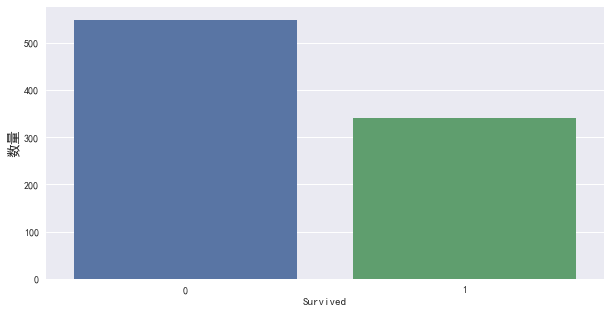

In [65]:
plt.figure(figsize = (10 , 5))
sns.countplot(x = 'Survived' , data = titanic)  #柱状图
plt.ylabel('数量',fontsize=14)
plt.show()

In [66]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

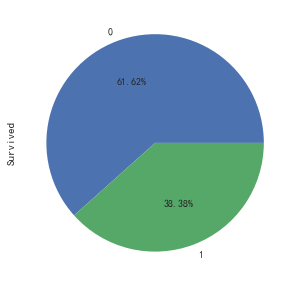

In [67]:
plt.figure(1 , figsize = (10 , 5))
titanic['Survived'].value_counts().plot.pie(autopct = '%.2f%%')#查看存活比例

## 性别是否影响生存率

### 男女比例

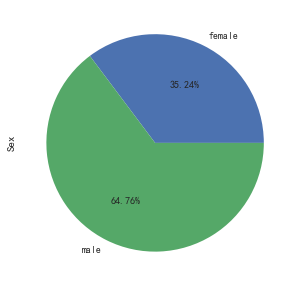

In [68]:
plt.figure(1 , figsize = (10 , 5))
titanic.groupby('Sex')['Sex'].count().plot.pie(autopct = '%.2f%%')

### 性别和是否生存的关系

In [69]:
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Figure size 720x360 with 0 Axes>

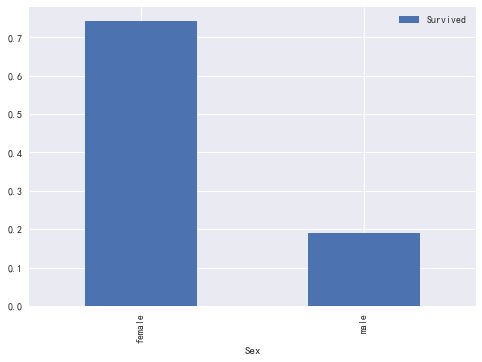

In [70]:
#性别与生存率关系
plt.figure(1 , figsize = (10 , 5))
titanic[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()#0：male，1：female
plt.show()

女性的生存率明显高于男性

## 船舱等级是否影响生存率

### 船舱等级的分布

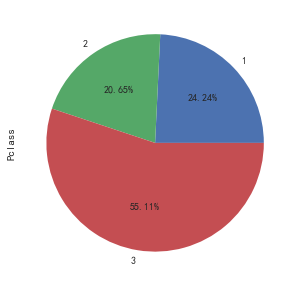

In [71]:
plt.figure(figsize = (10 , 5))
titanic.groupby('Pclass')['Pclass'].count().plot.pie(autopct = '%.2f%%')

### 船舱等级和是否生存的关系

In [72]:
print(titanic.groupby(['Pclass','Survived'])['Pclass'].count())

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64


<Figure size 720x360 with 0 Axes>

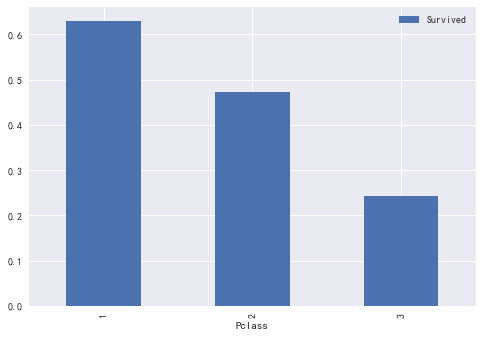

In [73]:
#船舱等级和生存与否的关系 Pclass
plt.figure(figsize = (10 , 5))
titanic[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

3等船舱人数最多，生存率最低

## 年龄是否影响生存率

### 年龄的分布

Text(0.5, 0, 'Age')

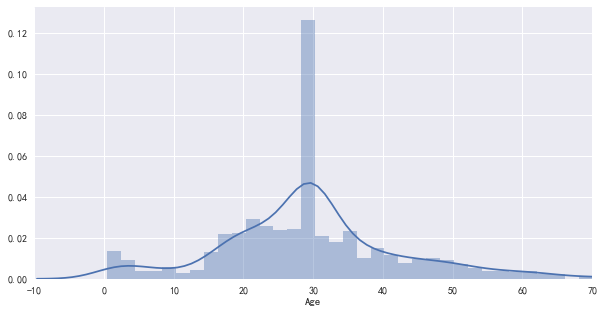

In [74]:
plt.figure(figsize = (10 , 5))
sns.distplot(titanic['Age'],bins=40)
plt.xlim(([-10,70]))
plt.xlabel('Age')

### 年龄与生存率的关系

Text(0.5, 0, 'Survived')

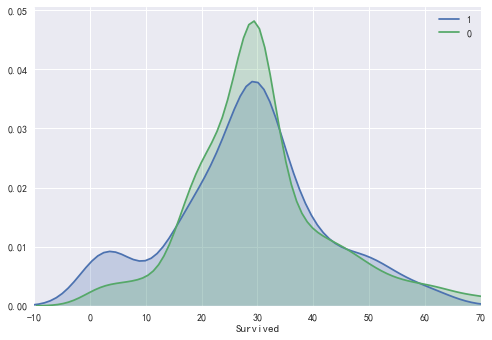

In [75]:
sns.kdeplot(titanic.Age[titanic.Survived==1], label='1', shade=True)  #存活的人年龄分布
sns.kdeplot(titanic.Age[titanic.Survived==0], label='0', shade=True)  #死亡的人年龄分布
plt.xlim(([-10,70]))
plt.xlabel('Survived')

### 对年龄进行均匀分组，按照10岁一组进行划分,不同年龄段的生存率

In [76]:
bins=np.arange(0,90,10)
titanic['Age_band']=pd.cut(titanic.Age,bins)

In [77]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(30, 40]"


In [78]:
#每个年龄段里面，存活和死亡的人数
titanic_ageband=titanic.groupby(['Age_band','Survived'])['Age_band'].count()
titanic_ageband

Age_band  Survived
(0, 10]   0            26
          1            38
(10, 20]  0            71
          1            44
(20, 30]  0           271
          1           136
(30, 40]  0            86
          1            69
(40, 50]  0            53
          1            33
(50, 60]  0            25
          1            17
(60, 70]  0            13
          1             4
(70, 80]  0             4
          1             1
Name: Age_band, dtype: int64

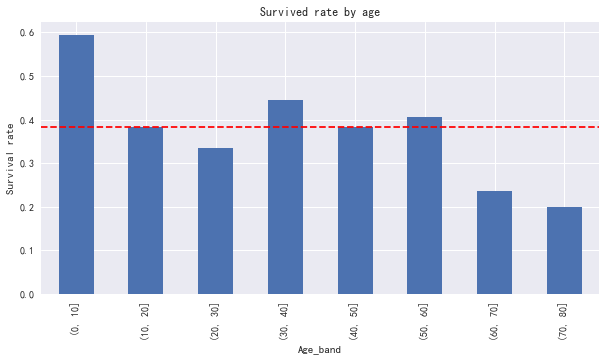

In [79]:
#每个年龄段的存活比例
titanic_ageband_survived=titanic.groupby('Age_band')['Survived'].mean()
plt.figure(figsize = (10 , 5))
titanic_ageband_survived.plot.bar(title='Survived rate by age')
plt.ylabel('Survival rate')
plt.axhline(y=0.383,color='r',linestyle='--') #平均存活比例

年龄段在20-40岁之间人数最多，但这个年龄段的生还率却不是最高的，反而年龄较小（0~10岁）的生还率是最高的

## 年龄和性别与生还率的关系

### 所有乘客中年龄和性别的人数统计

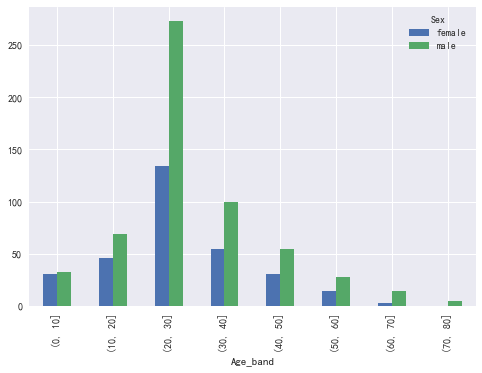

In [80]:
titanic_df1=titanic.pivot_table(values='Survived',index='Age_band',columns='Sex',aggfunc='count')
titanic_df1.plot(kind='bar')

20-30岁之间的男性居多

### 生还乘客中年龄和性别的人数统计

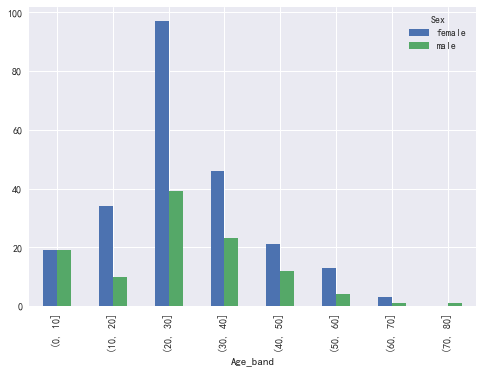

In [81]:
titanic_df2=titanic[titanic.Survived==1]
titanic_survived=titanic_df2.pivot_table(values='Survived',index='Age_band',columns='Sex',aggfunc='count')
titanic_survived.plot(kind='bar')

生还乘客中20-30之间的女性居多

### 年龄和性别的生还率

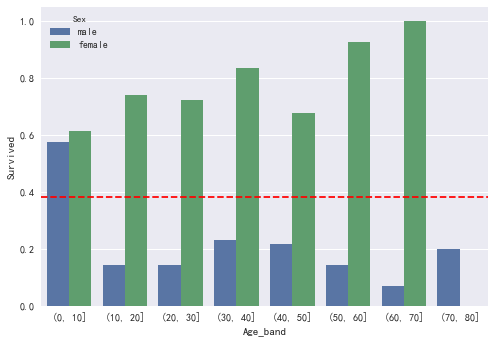

In [82]:
#年龄和性别的生还率
sns.barplot(data=titanic,x='Age_band',y='Survived',hue='Sex',ci=None)
plt.axhline(y=0.383,color='r',linestyle='--')

男性的人数明显多于女性，但女性的生还率明显高于男性，且女性的生还率都在40%以上。
综上可以看出，性别对生还率的影响大于年龄的影响。

## 年龄和舱位与生还率的关系

### 乘客中年龄和舱位的人数统计

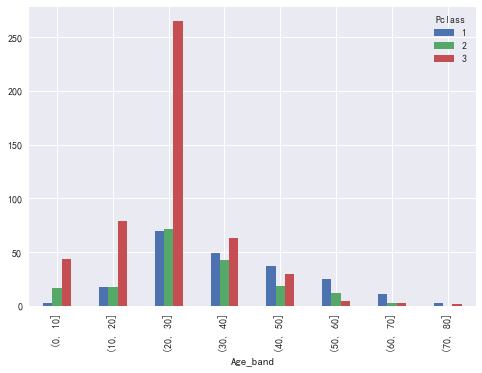

In [83]:
titanic_df3=titanic.pivot_table(values='Survived',index='Age_band',columns='Pclass',aggfunc='count')
titanic_df3.plot(kind='bar')

20-30岁之间的三等舱的人数最多

### 生还乘客中年龄和舱位的人数统计

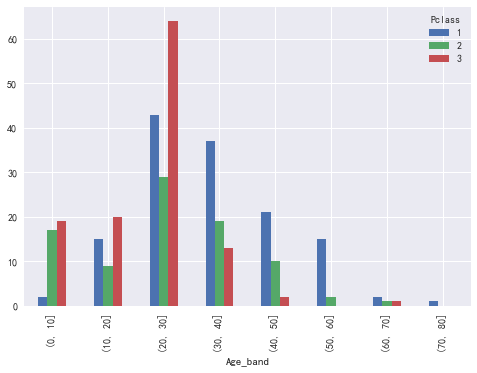

In [84]:
#生还乘客中年龄和舱位的人数统计
titanic_df4=titanic[titanic.Survived==1]
titanic_survived=titanic_df4.pivot_table(values='Survived',index='Age_band',columns='Pclass',aggfunc='count')
titanic_survived.plot(kind='bar')

### 乘客中年龄和舱位的生还概率

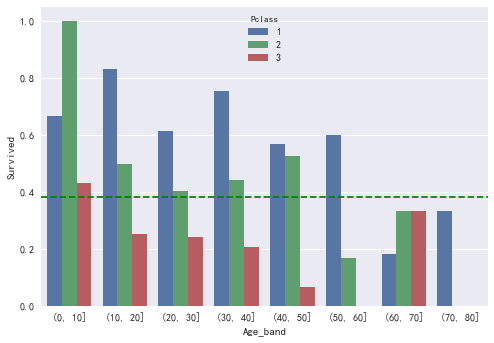

In [85]:
sns.barplot(data=titanic,x='Age_band',y='Survived',hue='Pclass',ci=None)
plt.axhline(y=0.383,color='g',linestyle='--')

从图中看出：3舱的人数最多，但3舱的生还率最小。而在0-50岁的年龄区间，1、2舱舱的生还率都大于40%。
同一个年龄段，除了0-10岁和60-70岁，区间外，1舱的生还率最高。
不同年龄段，也是1舱的生还率>2舱>3舱

## 还可以分析
性别和舱位共同对生还率的影响
年龄、性别、舱位共同对生还率的影响

# 数据编码

In [125]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [126]:
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

In [132]:
titanic["Sex"]=pd.get_dummies(titanic["Sex"],drop_first=True).values  #对性别进行编码

In [137]:
df_code=pd.get_dummies(titanic["Embarked"],drop_first=True)  #对登录港口进行编码

In [141]:
titanic=pd.concat([titanic,df_code],axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    uint8  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Q            891 non-null    uint8  
 12  S            891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 72.3+ KB


In [143]:
titanic.drop(columns='Embarked',inplace=True)

In [144]:
titanic.shape

(891, 12)

In [145]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    uint8  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Q            891 non-null    uint8  
 11  S            891 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 65.4+ KB


# 特征的选择

In [146]:
#分析数据间关系,选择特征
titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.221009,0.074053
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.074115,0.119224
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.117216,-0.162184
Q,-0.033606,0.003650,0.221009,-0.074115,-0.013855,-0.026354,-0.081228,-0.117216,1.000000,-0.499421
S,0.022204,-0.149683,0.074053,0.119224,-0.019336,0.068734,0.060814,-0.162184,-0.499421,1.000000


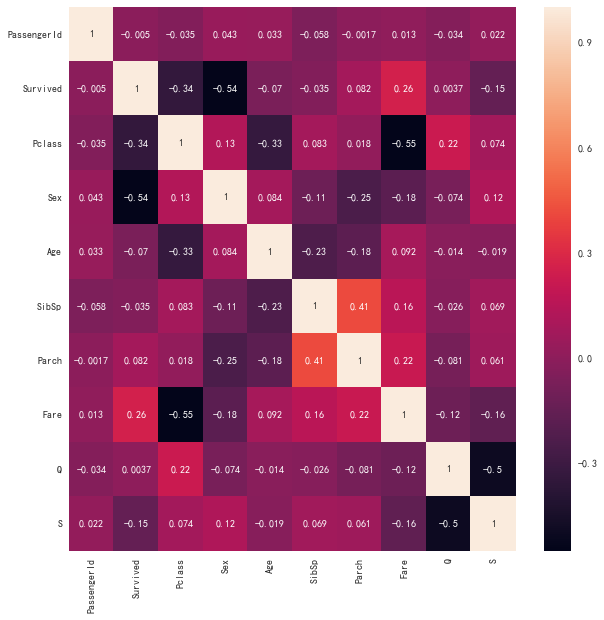

In [147]:
plt.figure(figsize = (10 , 10))
sns.heatmap(titanic.corr(),annot=True)#热图
plt.show()

In [148]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Q', 'S'],
      dtype='object')

In [149]:
# 选取特征
features = ["Pclass","Sex","Age","SibSp","Parch","Fare",'Q', 'S']
x_data_train = titanic[features]#特征
y_data_train = titanic["Survived"]#标签

# 对测试集处理


In [151]:
titanic_test = pd.read_csv("titanic_test.csv")
titanic_test=titanic_test.drop("Cabin",axis=1)#删除cabin列
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].mean())#均值填充
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic["Fare"].median())  #中位数填充
titanic_test["Embarked"] = titanic_test["Embarked"].fillna('S')#众数填充
titanic_test["Sex"]=pd.get_dummies(titanic_test["Sex"],drop_first=True).values  #对性别进行编码

df1_code=pd.get_dummies(titanic_test["Embarked"],drop_first=True)  #对登录港口进行编码
titanic_test=pd.concat([titanic_test,df1_code],axis=1)
titanic_test.drop(columns='Embarked',inplace=True)

# 选取特征
features = ["Pclass","Sex","Age","SibSp","Parch","Fare",'Q', 'S']
x_data_test = titanic_test[features]#特征

In [152]:
x_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    uint8  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
 6   Q       418 non-null    uint8  
 7   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


# 建模分析

## 逻辑回归

In [153]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [185]:
# 逻辑回归模型
lr = LogisticRegression()
params={'C':[0.04,0.05,0.06,0.07,0.08,0.09,0.1]}
grid_search=GridSearchCV(lr,param_grid=params,cv=5,verbose=2,n_jobs=-1)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    7.4s finished


{'C': 0.09}

In [186]:
grid_search.score(x_data_train,y_data_train)

0.8024691358024691

In [187]:
grid_search.predict(x_data_test)  #做预测

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [188]:
lr_results=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':grid_search.predict(x_data_test)})
lr_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## KNN

In [189]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
params={'n_neighbors':[2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(knn,param_grid=params,cv=5,verbose=2,n_jobs=-1)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished
D:\conda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 7}

In [160]:
grid_search.score(x_data_train,y_data_train)

0.7744107744107744

In [161]:
grid_search.predict(x_data_test)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [162]:
knn_results=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':grid_search.predict(x_data_test)})
knn_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## 决策树

In [163]:
from sklearn import tree

In [164]:
dtree = tree.DecisionTreeClassifier()
params={'max_depth':[2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(dtree,param_grid=params,cv=5,verbose=2,n_jobs=-1)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

{'max_depth': 6}

In [165]:
grid_search.score(x_data_train,y_data_train)

0.8653198653198653

In [166]:
grid_search.predict(x_data_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [167]:
dtree_results=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':grid_search.predict(x_data_test)})
dtree_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## 随机森林

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
RF = RandomForestClassifier(n_estimators=100)
params={'min_samples_split':[2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(dtree,param_grid=params,cv=5,verbose=2,n_jobs=-1)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

{'min_samples_split': 7}

In [179]:
grid_search.score(x_data_train,y_data_train)

0.9259259259259259

In [180]:
grid_search.predict(x_data_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [181]:
rf_results=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':grid_search.predict(x_data_test)})
rf_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


## Adaboost

In [182]:
from sklearn.ensemble import AdaBoostClassifier

In [193]:
adaboost = AdaBoostClassifier(n_estimators=200)
params={"n_estimators": np.arange(10,200,20),'learning_rate':np.linspace(0.01,2,10)}
grid_search=GridSearchCV(adaboost,param_grid=params,cv=5,verbose=2,n_jobs=-1)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   25.8s finished
D:\conda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 1.3366666666666667, 'n_estimators': 90}

In [194]:
grid_search.score(x_data_train,y_data_train)

0.8518518518518519

In [195]:
grid_search.predict(x_data_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
ad_results=pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':grid_search.predict(x_data_test)})
ad_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## XGBoosting

In [196]:
import xgboost as xgb
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [197]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier()
params = {
        'n_estimators':range(100,200,50),
        'max_depth':range(2,15,4),
        'learning_rate':np.linspace(0.01,3,5),
        }
grid_search=GridSearchCV(xgboost_model,param_grid=params,cv=5)
grid_search.fit(x_data_train, y_data_train)
grid_search.best_params_

D:\conda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 150}

In [198]:
grid_search.score(x_data_train,y_data_train)

0.8754208754208754

In [70]:
xgboost_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=14, n_estimators=150)
best_model=xgboost_model.fit(x_data_train, y_data_train)

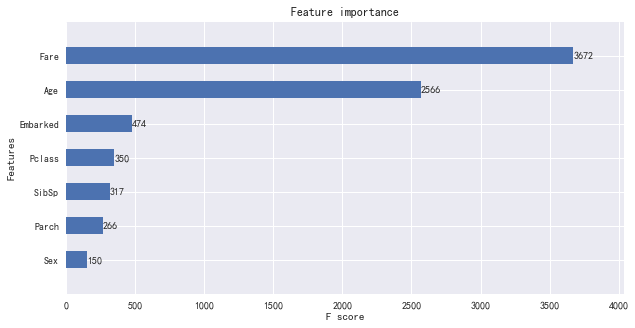

In [72]:
from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(10,5))
plot_importance(best_model,height=0.5,ax=ax,max_num_features=64)
plt.show()